In [125]:
import pandas as pd
import re
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

In [126]:
df_train=pd.read_csv('D:\DataScience\word2vec-nlp-tutorial\labeledTrainData.tsv\labeledTrainData.tsv',sep='\\t')
df_test=pd.read_csv('D:\DataScience\word2vec-nlp-tutorial\\testData.tsv\\testData.tsv',sep='\\t')

C:\Users\Asus\AppData\Local\Temp\ipykernel_684\2696385226.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_train=pd.read_csv('D:\DataScience\word2vec-nlp-tutorial\labeledTrainData.tsv\labeledTrainData.tsv',sep='\\t')
C:\Users\Asus\AppData\Local\Temp\ipykernel_684\2696385226.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_test=pd.read_csv('D:\DataScience\word2vec-nlp-tutorial\\testData.tsv\\testData.tsv',sep='\\t')


In [127]:
df_train.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [128]:
df_test.head()

,id,review
0,"""12311_10""","""Naturally in a film who's main themes are of ..."
1,"""8348_2""","""This movie is a disaster within a disaster fi..."
2,"""5828_4""","""All in all, this is a movie for kids. We saw ..."
3,"""7186_2""","""Afraid of the Dark left me with the impressio..."
4,"""12128_7""","""A very accurate depiction of small time mob l..."


In [129]:
X=df_train.drop('sentiment',axis=1)
y=df_train['sentiment']

In [130]:
X.shape

(25000, 2)

In [131]:
y.shape

(25000,)

In [132]:
def text_clean(text):
    text=re.sub(r'<.*?>',' ',text)
    text=re.sub(r'[^a-zA-Z]',' ',text).lower()
    text=re.sub(r'\s+',' ',text).strip()
    return text

In [133]:
X=X['review'].apply(text_clean)

In [134]:
X.head()

0    with all this stuff going down at the moment w...
1    the classic war of the worlds by timothy hines...
2    the film starts with a manager nicholas bell g...
3    it must be assumed that those who praised this...
4    superbly trashy and wondrously unpretentious s...
Name: review, dtype: object

In [135]:
tf=TfidfVectorizer(max_features=5000)
X=tf.fit_transform(X)

In [136]:
# sc=StandardScaler()
# X=sc.fit_transform(X)

from sklearn.preprocessing import MaxAbsScaler
mas = MaxAbsScaler()
X = mas.fit_transform(X)

In [137]:
# pca=PCA(n_components=0.99,whiten=True,random_state=42)
# X=pca.fit_transform(X)
from sklearn.decomposition import TruncatedSVD
svd=TruncatedSVD(n_components=400,random_state=42)
X=svd.fit_transform(X)

In [138]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [139]:
ln=LogisticRegression(solver='liblinear',random_state=42)

In [140]:
param_grid={
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1','l2'],
}
gs=GridSearchCV(
    estimator=ln, 
    param_grid=param_grid, 
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1   
).fit(X_train,y_train)

In [141]:
best_model=gs.best_estimator_

In [142]:
score=best_model.score(X_test,y_test)

In [ ]:
score

0.8708

In [144]:
y_pred=gs.predict(X_test)

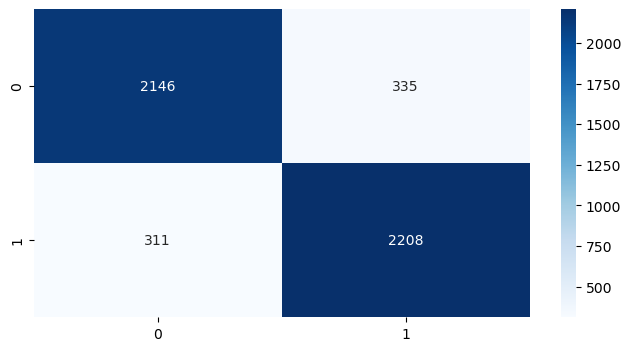

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()

In [152]:
from sklearn.svm import LinearSVC

svc=LinearSVC( max_iter=1000,random_state=42)

param_grid={
    'C':[0.01,0.1,1,10]
}
gs2=GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    n_jobs=-1,
    cv=5,
    scoring='accuracy'
).fit(X_train,y_train)

best_model2=gs2.best_estimator_
score2=gs2.score(X_test,y_test)
score2

0.8722

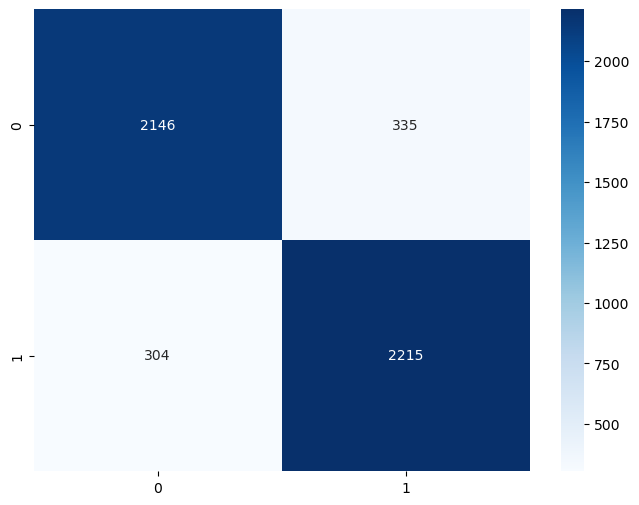

In [157]:
y_pred2=gs2.predict(X_test)
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, fmt='d', cmap='Blues')
plt.show()

In [154]:
from sklearn.ensemble import VotingClassifier

vot=VotingClassifier(estimators=[('ln',gs),('svc',gs2)])
vot.fit(X_train,y_train)

VotingClassifier(estimators=[('ln',
                              GridSearchCV(cv=5,
                                           estimator=LogisticRegression(random_state=42,
                                                                        solver='liblinear'),
                                           n_jobs=-1,
                                           param_grid={'C': [0.01, 0.1, 1, 10,
                                                             100],
                                                       'penalty': ['l1', 'l2']},
                                           scoring='accuracy')),
                             ('svc',
                              GridSearchCV(cv=5,
                                           estimator=LinearSVC(random_state=42),
                                           n_jobs=-1,
                                           param_grid={'C': [0.01, 0.1, 1, 10]},
                                           scoring='accuracy'))])

In [156]:
scorevot=vot.score(X_test,y_test)
scorevot

0.8704

<function matplotlib.pyplot.show(close=None, block=None)>

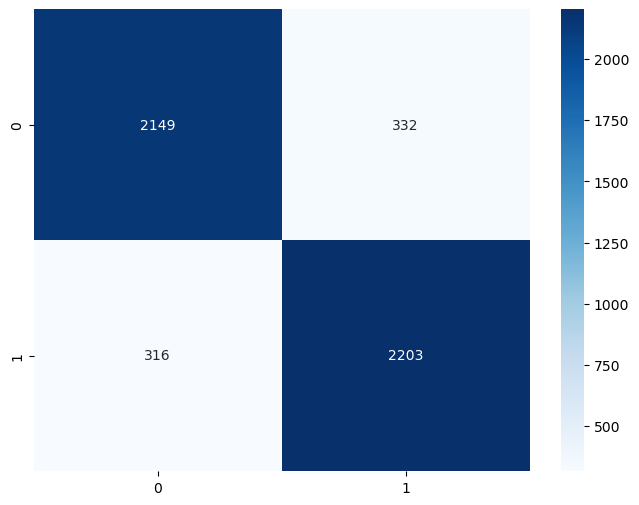

In [159]:
y_predvot=vot.predict(X_test)
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,y_predvot),annot=True,fmt='d',cmap='Blues')
plt.show